<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#looking-at-author-trajectories" data-toc-modified-id="looking-at-author-trajectories-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>looking at author trajectories</a></span></li><li><span><a href="#most-active-authors" data-toc-modified-id="most-active-authors-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>most active authors</a></span></li><li><span><a href="#subsetting-regulars" data-toc-modified-id="subsetting-regulars-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>subsetting regulars</a></span></li></ul></div>

In [1]:
from network_stats import *
import seaborn as sns

ImportError: No module named cloud

In [22]:
stats_df = load_stats_df()

In [23]:
stats_df.shape

(6232, 7)

In [35]:
main_subs = ['The_Donald', 'changemyview']
all_subs = stats_df.subreddit.unique()
for subreddit in main_subs:
    if subreddit not in all_subs:
        print(f'adding {subreddit} to stats_df')
        saveStatsDf(subreddit)
    else:
        print (f'{subreddit} is already in table')

The_Donald is already in table
changemyview is already in table


In [37]:
df = load_stats_df()
df.head()

,stat,author_counts,author_net_density,bipartite_edge_weights,sub_counts,sub_net_density,subreddit
0,count,931.000000,0.032704,11491.000000,2554.000000,0.080926,bestoflegaladvice
1,mean,12.342642,0.032704,15.381516,4.499217,0.080926,bestoflegaladvice
2,std,25.607200,0.032704,40.268911,23.950321,0.080926,bestoflegaladvice
3,min,1.000000,0.032704,3.000000,1.000000,0.080926,bestoflegaladvice
4,25%,4.500000,0.032704,4.000000,1.000000,0.080926,bestoflegaladvice


In [77]:
density = (df[df['stat']=='count']
           .set_index('subreddit')
           .rename(columns=
                   {'author_net_density':'author',
                       'sub_net_density':'sub',
                   'bipartite_edge_weights':'edge_count'}))

density['count_ratio'] = density['author_counts']/density['sub_counts']
density['density_ratio'] = density['author']/density['sub']

In [92]:
density.loc['The_Donald']

stat                  count
author_counts         27756
author            0.0504612
edge_count           130977
sub_counts             7187
sub              0.00108348
count_ratio         3.86197
density_ratio       46.5731
Name: The_Donald, dtype: object

In [93]:
density.loc['changemyview']

stat                 count
author_counts         3556
author            0.059925
edge_count           32882
sub_counts            4047
sub              0.0184246
count_ratio       0.878676
density_ratio      3.25245
Name: changemyview, dtype: object

In [94]:
density.describe()

,author_counts,author,edge_count,sub_counts,sub,count_ratio,density_ratio
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,1465.870513,0.021831,10999.394872,1875.515385,0.100522,0.650705,0.937921
std,2359.219331,0.026058,19025.358018,1242.223506,0.099955,0.516991,3.551343
min,42.000000,-0.013153,78.000000,36.000000,0.001083,0.063419,-0.034101
25%,419.750000,0.007576,2869.500000,1076.750000,0.030380,0.343619,0.073634
50%,695.000000,0.013467,4740.000000,1534.000000,0.064492,0.518723,0.218542
75%,1504.000000,0.025061,10411.500000,2259.250000,0.136121,0.814928,0.567104
max,27756.000000,0.220022,183199.000000,8578.000000,0.654177,6.461538,53.764617


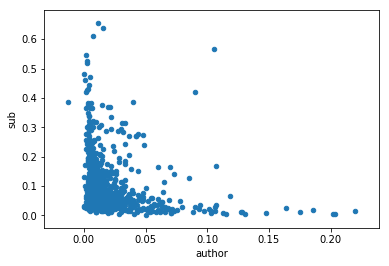

In [69]:
density.plot('author','sub', kind='scatter');

In [95]:
density[density['author']<0]

,stat,author_counts,author,edge_count,sub_counts,sub,count_ratio,density_ratio
subreddit,,,,,,,,
EndlessFrontier,count,612.0,-0.000057,1322.0,491.0,0.130111,1.246436,-0.000439
BlackSquad,count,42.0,-0.013153,78.0,36.0,0.385714,1.166667,-0.034101


In [96]:
density.sort_values('author').tail()

,stat,author_counts,author,edge_count,sub_counts,sub,count_ratio,density_ratio
subreddit,,,,,,,,
Futurology,count,8748.0,0.174829,104266.0,6013.0,0.010514,1.454848,16.629010
OldSchoolCool,count,9555.0,0.185300,128163.0,7161.0,0.019105,1.334311,9.698982
WTF,count,15132.0,0.202251,183199.0,8578.0,0.005792,1.764048,34.916064
television,count,12948.0,0.203374,154763.0,7200.0,0.003783,1.798333,53.764617
AdviceAnimals,count,13443.0,0.220022,160699.0,7580.0,0.015304,1.773483,14.376586


In [97]:
density.sort_values('sub').tail()

,stat,author_counts,author,edge_count,sub_counts,sub,count_ratio,density_ratio
subreddit,,,,,,,,
MemoryDefrag,count,769.0,0.001730,2868.0,1100.0,0.547193,0.699091,0.003161
rocket_league_trading,count,852.0,0.105379,2365.0,617.0,0.564829,1.380875,0.186568
NarutoBlazing,count,885.0,0.007756,2673.0,926.0,0.610709,0.955724,0.012699
PalaceClothing,count,492.0,0.015552,2176.0,906.0,0.638277,0.543046,0.024365
GOtrades,count,467.0,0.011853,1370.0,573.0,0.654177,0.815009,0.018119


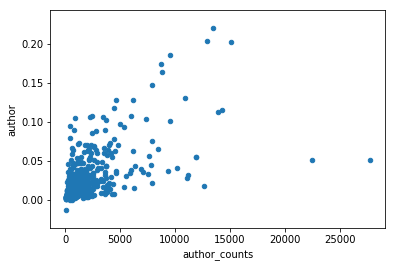

In [100]:
density.plot('author_counts','author', kind='scatter');

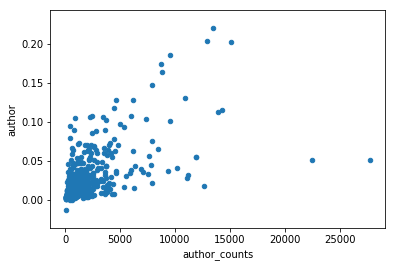

In [76]:
density.plot('author_counts','author', kind='scatter');

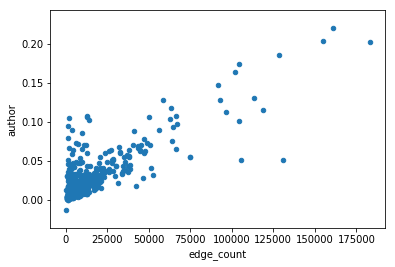

In [81]:
density.plot('edge_count','author', kind='scatter');

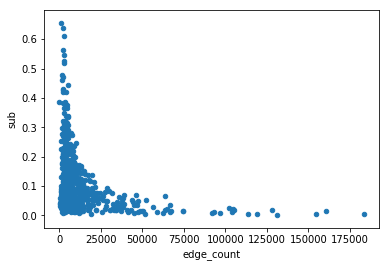

In [82]:
density.plot('edge_count','sub', kind='scatter');

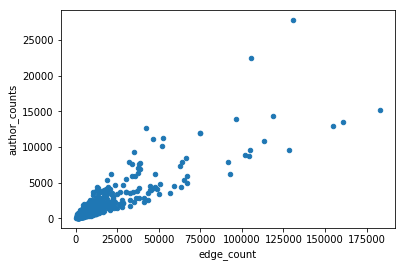

In [84]:
density.plot('edge_count','author_counts', kind='scatter');

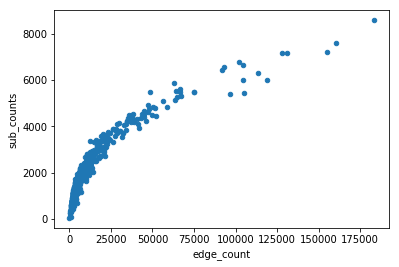

In [86]:
density.plot('edge_count','sub_counts', kind='scatter');

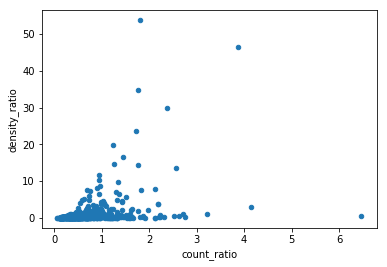

In [90]:
density.plot('count_ratio','density_ratio', kind='scatter');

In [114]:
def fetchNetworkData(subreddit, months):
    dfs = []
    for month in months:
        print(f'fetching {month}')
        query = """SELECT subreddit, author, COUNT(created_utc) as weight
                    FROM `fh-bigquery.reddit_comments.{0}`
                    WHERE author in (SELECT author
                                     FROM `fh-bigquery.reddit_comments.{0}`
                                     WHERE (subreddit = '{1}') 
                                             AND author not in (SELECT author
                                                                 FROM `fh-bigquery.reddit_comments.bots_201505`)
                                            AND (lower(author) NOT LIKE '%bot%')
                                            AND (author NOT LIKE 'JlmmyButler')
                                            AND (author NOT LIKE 'TotesMessenger')
                                    GROUP BY author
                                    HAVING COUNT(author) > 2)
                    GROUP BY subreddit, author
                    HAVING weight > 2
                """.format(month, subreddit)

        data = fetchQuery(query)
        data['month'] = month
        
        data['month'] = month
                
        table_name = f'{subreddit}_network_{month}' 
        data.to_sql(name=table_name, con=engine, if_exists='replace', index=False)
        
def loadMonthlyNetworks(subreddit, months, engine):
    dfs = []
    for month in months:
        table_name = f'{subreddit}_network_{month}' 
        df = pd.read_sql_table(table_name=table_name, con=engine)
        
        dfs.append(df)
        
    return dfs

subreddit = 'changemyview'
engine = get_engine()
dfs = loadMonthlyNetworks(subreddit, cmv_months, engine)

In [116]:
subreddit = 'changemyview'
fetchNetworkData(subreddit, cmv_months)

fetching 2015_01
fetching 2015_02
fetching 2015_03
fetching 2015_04
fetching 2015_05
fetching 2015_06
fetching 2015_07
fetching 2015_08
fetching 2015_09
fetching 2015_10
fetching 2015_11
fetching 2015_12
fetching 2016_01
fetching 2016_02
fetching 2016_03
fetching 2016_04
fetching 2016_05
fetching 2016_06
fetching 2016_07
fetching 2016_08
fetching 2016_09
fetching 2016_10
fetching 2016_11
fetching 2016_12
fetching 2017_01
fetching 2017_02
fetching 2017_03
fetching 2017_04
fetching 2017_05
fetching 2017_06
fetching 2017_07
fetching 2017_08
fetching 2017_09
fetching 2017_10
fetching 2017_11
fetching 2017_12
fetching 2018_01
fetching 2018_02
fetching 2018_03


In [141]:
cmv = pd.concat(dfs)

In [142]:
cmv.shape

(125563, 4)

In [143]:
cmv.head()

,subreddit,author,weight,month
0,de,jaytehman,4,2018_01
1,de,zabolekar,5,2018_01
2,de,fyi1183,5,2018_01
3,de,thelandman19,7,2018_01
4,de,dal33t,7,2018_01


## looking at author trajectories

In [5]:
cmv_months = ['2015_01','2015_02','2015_03','2015_04','2015_05','2015_06',
              '2015_07','2015_08','2015_09','2015_10','2015_11','2015_12',
              '2016_01','2016_02','2016_03','2016_04','2016_05','2016_06',
              '2016_07','2016_08','2016_09','2016_10','2016_11','2016_12',
              '2017_01','2017_02','2017_03','2017_04','2017_05','2017_06',
              '2017_07','2017_08','2017_09','2017_10','2017_11','2017_12',
              '2018_01','2018_02','2018_03']

In [6]:
def fetchMonthlyCounts(subreddit, months, engine):
    for month in months:
        print(f'fetching {month}')
        query = """SELECT subreddit, author, COUNT(created_utc) as weight
                    FROM `fh-bigquery.reddit_comments.{0}`
                    WHERE (subreddit = '{1}')
                    GROUP BY subreddit, author
                """.format(month, subreddit)

        data = fetchQuery(query)
        data['month'] = month
                
        table_name = f'{subreddit}_{month}' 
        data.to_sql(name=table_name, con=engine, if_exists='replace', index=False)

def loadMonthlyCounts(subreddit, months, engine):
    dfs = []
    for month in months:
        table_name = f'{subreddit}_{month}' 
        df = pd.read_sql_table(table_name=table_name, con=engine)
        
        dfs.append(df)
        
    return dfs

subreddit = 'changemyview'
engine = get_engine()
#fetchMonthlyCounts(subreddit, cmv_months, engine)
dfs = loadMonthlyCounts(subreddit, cmv_months, engine)

In [103]:
cmv = pd.concat(dfs)
cmv = cmv[~cmv['author'].isin(['[deleted]', 'DeltaBot'])]
cmv.shape

(324087, 4)

In [104]:
cmv['weight'].describe()

count    324087.000000
mean          7.307424
std          22.990294
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        1068.000000
Name: weight, dtype: float64

## most active authors

In [105]:
author_counts = cmv.groupby('author')['weight'].count()
comment_counts = cmv.groupby('author')['weight'].sum()

In [106]:
counts = pd.DataFrame({'months':author_counts, 'comments':comment_counts})

In [109]:
counts = counts.sort_values(['comments','months'], ascending=False)
counts['logcomments'] = np.log(counts['comments'])
counts.head()

,comments,months,logcomments
author,,,
Ansuz07,14834,31,9.604677
cdb03b,11799,38,9.375770
Hq3473,11680,39,9.365633
huadpe,10325,39,9.242323
hacksoncode,9590,39,9.168476


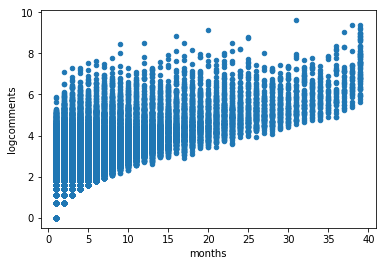

In [110]:
counts.plot('months','logcomments',kind='scatter');

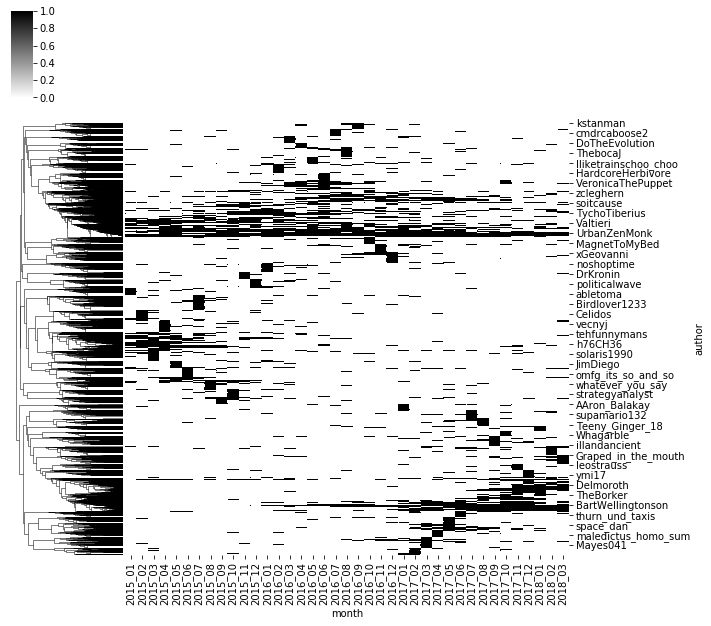

In [111]:
monthly_counts = cmv['author'].value_counts()
regulars = monthly_counts[monthly_counts>4].index
subset = cmv[(cmv['weight']>=5)&(cmv['author'].isin(regulars))].sort_values(['month','author'])
subset['value'] = 1
timeline = subset.pivot_table(index='author',columns='month',values='value').fillna(0)
sns.clustermap(timeline, cmap='binary', col_cluster=False, metric='cosine');

## subsetting regulars

In [124]:
edges = cmv[cmv['author'].isin(regulars)]

In [112]:
subset.shape[0]/cmv.shape[0]

0.1878785634721541

In [158]:
subsets = []
for mon in dfs:
    subset = df[df['author'].isin(regulars)]
    print(subset.shape[0]/df.shape[0])
    subsets.append(subset)

0.29757980446848675
0.2641863490792634
0.22154804199433156


In [163]:
stats_dfs = []
for data in subsets:
    month = data['month'].unique()[0]
    print(month)
    data = data[['subreddit','author','weight']]
    stats_df = get_stats_df(data, 'changemyview')
    stats_df.reset_index(drop=False, inplace=True)
    stats_df['month'] = month
    
    stats_dfs.append(stats_df)

2018_01
2018_02
2018_03


In [182]:
stats = pd.concat(stats_dfs)
stats.reset_index(inplace=True)

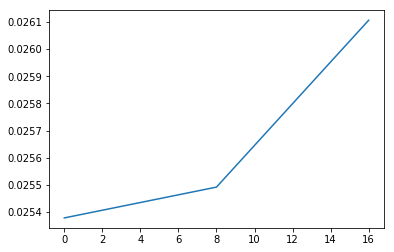

In [184]:
stats[stats['stat']=='count']['sub_net_density'].plot();

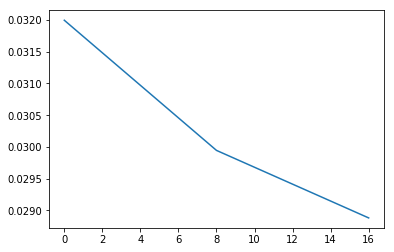

In [185]:
stats[stats['stat']=='count']['author_net_density'].plot();